<a href="https://colab.research.google.com/github/DeekshaChowdhary/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [3]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Reviews.csv"
df = pd.read_csv(file_path)


In [4]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [8]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [9]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [10]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

# Download necessary NLTK data (run this once)
nltk.download('stopwords')
nltk.download('wordnet')

df = pd.DataFrame({'Text': ["This is an Example sentence! It's full of Noise..."]})
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove punctuation
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

# Remove stopwords
stop = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))

# Lemmatization (convert words to their base form)
df['Text'] = df['Text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))

# Correct spelling (Optional, slow for large datasets)
# df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))

# Print cleaned text
print(df['Text'])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    example sentence full noise
Name: Text, dtype: object


In [24]:
reviews.rename(columns=lambda x: x.strip(), inplace=True)  # Remove leading/trailing spaces
print(reviews.columns)  # Check column names again


Index(['Text'], dtype='object')


In [25]:
print(reviews.head())
print(reviews.info())


                          Text
0  example sentence full noise
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1 non-null      object
dtypes: object(1)
memory usage: 136.0+ bytes
None


In [26]:
df = pd.read_csv(file_path)


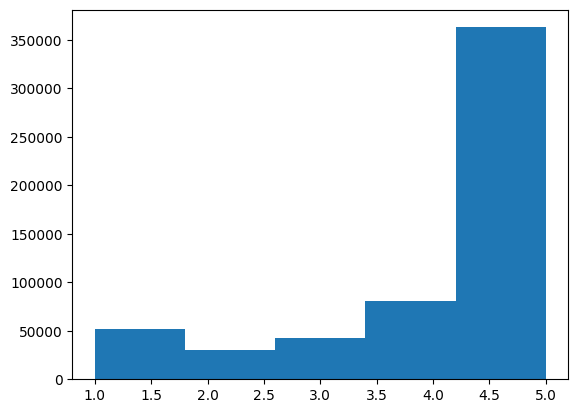

Score
1     52264
2     29743
3     42638
4     80654
5    363102
Name: Id, dtype: int64


In [28]:
reviews = df
reviews.dropna(inplace=True)
reviews.Score.hist(bins=5,grid=False)
plt.show()
print(reviews.groupby('Score').count().Id)

In [27]:
import matplotlib.pyplot as plt

reviews.dropna(inplace=True)

if 'Score' in reviews.columns:
    reviews['Score'].hist(bins=5, grid=False)  # Use bracket notation reviews['Score']
    plt.show()

    print(reviews.groupby('Score').count()['Id'])  # Ensure 'Id' exists too
else:
    print("Column 'Score' not found in the DataFrame")


Column 'Score' not found in the DataFrame


In [29]:
score_1 = reviews[reviews['Score'] == 1].sample(n=18)
score_2 = reviews[reviews['Score'] == 2].sample(n=18)
score_3 = reviews[reviews['Score'] == 3].sample(n=18)
score_4 = reviews[reviews['Score'] == 4].sample(n=18)
score_5 = reviews[reviews['Score'] == 5].sample(n=18)

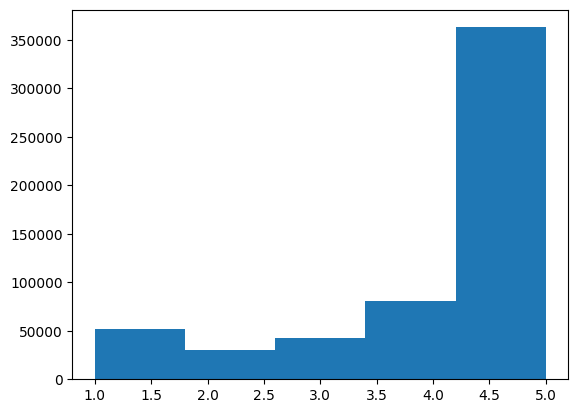

Score
1     52264
2     29743
3     42638
4     80654
5    363102
Name: Id, dtype: int64


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Reviews.csv"
df = pd.read_csv(file_path)

# Remove any leading or trailing spaces in column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Ensure 'Score' column exists
if 'Score' not in df.columns:
    print("Error: 'Score' column not found in DataFrame")
else:
    # Split data based on 'Score'
    score_1 = df[df['Score'] == 1]
    score_2 = df[df['Score'] == 2]
    score_3 = df[df['Score'] == 3]
    score_4 = df[df['Score'] == 4]
    score_5 = df[df['Score'] == 5]

    # Concatenate all score categories into one DataFrame
    reviews = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)

    # Reset index
    reviews.reset_index(drop=True, inplace=True)

    # Plot histogram of scores
    reviews['Score'].hist(bins=5, grid=False)
    plt.show()

    # Group by Score and count occurrences of 'Id' column
    if 'Id' in reviews.columns:
        print(reviews.groupby('Score').count()['Id'])
    else:
        print(reviews.groupby('Score').size())  # Alternative if 'Id' is missing


In [17]:
!pip install wordcloud

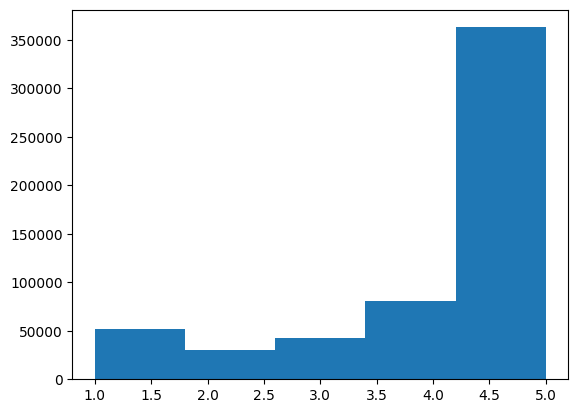

Score
1     52264
2     29743
3     42638
4     80654
5    363102
Name: Id, dtype: int64


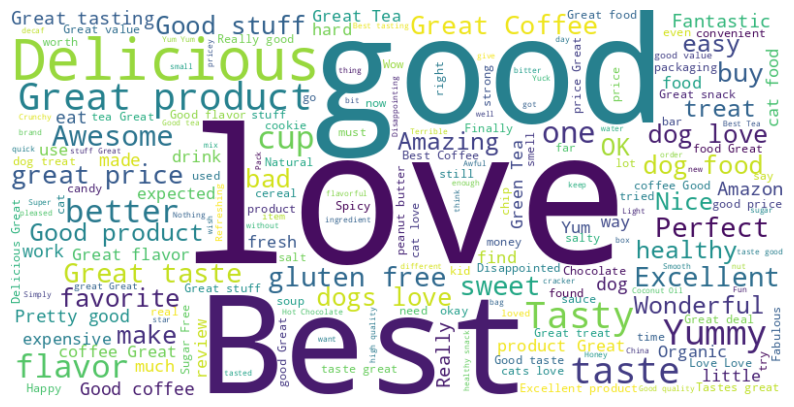

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Reviews.csv"
df = pd.read_csv(file_path)

# Clean column names (remove leading/trailing spaces)
df.rename(columns=lambda x: x.strip(), inplace=True)

# Drop missing values
df.dropna(inplace=True)

# Ensure 'Score' and 'Summary' columns exist
if 'Score' not in df.columns or 'Summary' not in df.columns:
    print("Error: 'Score' or 'Summary' column not found in DataFrame")
else:
    # Split data based on 'Score'
    score_1 = df[df['Score'] == 1]
    score_2 = df[df['Score'] == 2]
    score_3 = df[df['Score'] == 3]
    score_4 = df[df['Score'] == 4]
    score_5 = df[df['Score'] == 5]

    # Concatenate all score categories into one DataFrame
    reviews = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)

    # Reset index
    reviews.reset_index(drop=True, inplace=True)

    # Plot histogram of scores
    reviews['Score'].hist(bins=5, grid=False)
    plt.show()

    # Group by Score and count occurrences of 'Id' column
    if 'Id' in reviews.columns:
        print(reviews.groupby('Score').count()['Id'])
    else:
        print(reviews.groupby('Score').size())  # Alternative if 'Id' is missing

    # ✅ Generate WordCloud for the 'Summary' column
    reviews_str = " ".join(reviews["Summary"].astype(str).to_numpy())  # Convert to string
    wordcloud = WordCloud(background_color='white', width=800, height=400).generate(reviews_str)

    # Display WordCloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [5]:
# Example: Creating a sample sentiment analysis DataFrame
df_sentiments = pd.DataFrame({
    "Sentiment": ["Positive", "Negative", "Neutral", "Positive", "Negative"]
})


In [7]:
print(df.shape, df_sentiments.shape)


(568454, 10) (5, 1)


In [8]:
import pandas as pd

# Load CSV file
file_path = "/content/drive/MyDrive/Colab Notebooks/Reviews.csv"
df = pd.read_csv(file_path)

# Ensure df_sentiments exists
if 'df_sentiments' not in locals():
    print("Error: df_sentiments is not defined. Please generate it before merging.")
else:
    # Merge df with df_sentiments
    df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)

    # Display first 3 rows
    print(df_c.head(3))


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   

  Sentiment  
0  Positive  
1  Negative  
2   Neutral  


In [14]:
print(df_c.columns)  # Check available columns


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Sentiment'],
      dtype='object')


In [15]:
print(df_c.columns.tolist())  # Check exact column names


['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text', 'Sentiment']


In [16]:
df_c.columns = df_c.columns.str.strip().str.lower()  # Removes spaces and converts to lowercase
